<a href="https://www.kaggle.com/code/chiragb254/dimond-price-prediction?scriptVersionId=162349240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from itertools import product
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/kaggle/input/the-largest-diamond-dataset-currely-on-kaggle/diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [5]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [7]:
df.shape

(219703, 26)

In [8]:
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [9]:
df.isnull().values.any()

True

In [10]:
df.isna().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [11]:
df.drop(columns=['fluor_intensity','Unnamed: 0'],inplace=True)

In [12]:
df.shape

(219703, 24)

In [13]:
for col in df.columns:
    print(f'Column \033[1m{col}\033[0m has \033[1m{len(df[col].unique())}\033[0m values')

Column cut has 11 values
Column color has 11 values
Column clarity has 11 values
Column carat_weight has 878 values
Column cut_quality has 6 values
Column lab has 3 values
Column symmetry has 5 values
Column polish has 5 values
Column eye_clean has 5 values
Column culet_size has 9 values
Column culet_condition has 4 values
Column depth_percent has 534 values
Column table_percent has 235 values
Column meas_length has 1415 values
Column meas_width has 1155 values
Column meas_depth has 852 values
Column girdle_min has 10 values
Column girdle_max has 10 values
Column fluor_color has 6 values
Column fancy_color_dominant_color has 13 values
Column fancy_color_secondary_color has 11 values
Column fancy_color_overtone has 9 values
Column fancy_color_intensity has 10 values
Column total_sales_price has 22202 values


# MARKDOWN

In [14]:
len(df['total_sales_price'].unique())

22202

In [15]:
df_y = df['total_sales_price']

In [16]:
df_y.head()

0    200
1    200
2    200
3    200
4    200
Name: total_sales_price, dtype: int64

<Axes: xlabel='total_sales_price'>

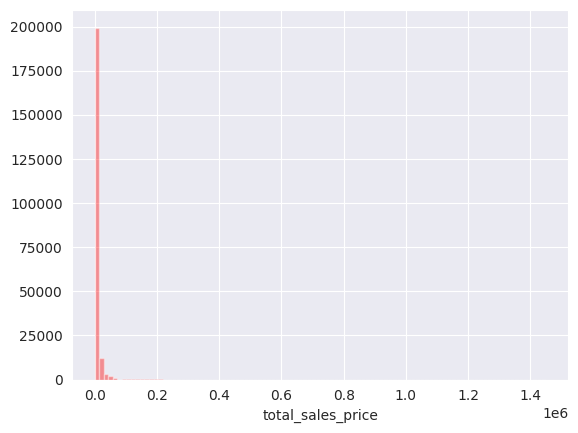

In [17]:
# set the background style of the plot
sns.set_style('darkgrid')
sns.distplot(df['total_sales_price'], kde = False, color ='red', bins = 100)


In [18]:
df.drop(columns=['total_sales_price'],inplace=True)

In [19]:
df.dtypes

cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
dtype: object

# Numarical

In [20]:
numarical_columns = df.select_dtypes(include=np.number).columns.tolist()

df_num = df[numarical_columns]
df_num.dtypes

carat_weight     float64
depth_percent    float64
table_percent    float64
meas_length      float64
meas_width       float64
meas_depth       float64
dtype: object

In [21]:
df_num.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82


In [22]:
for col in df_num.columns:
    print(f'Numarical Column {col} has {len(df[col].unique())}')

Numarical Column carat_weight has 878
Numarical Column depth_percent has 534
Numarical Column table_percent has 235
Numarical Column meas_length has 1415
Numarical Column meas_width has 1155
Numarical Column meas_depth has 852


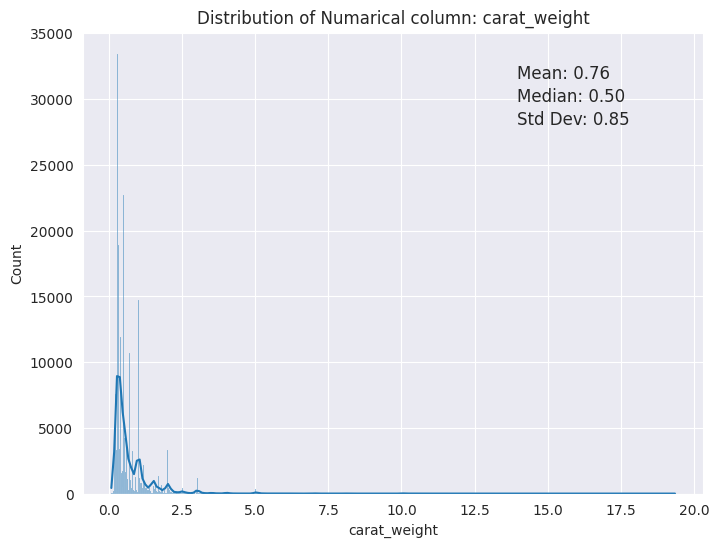

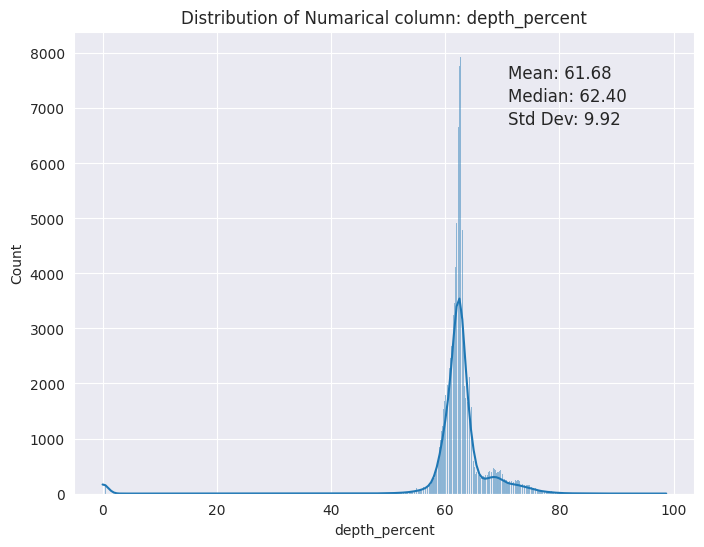

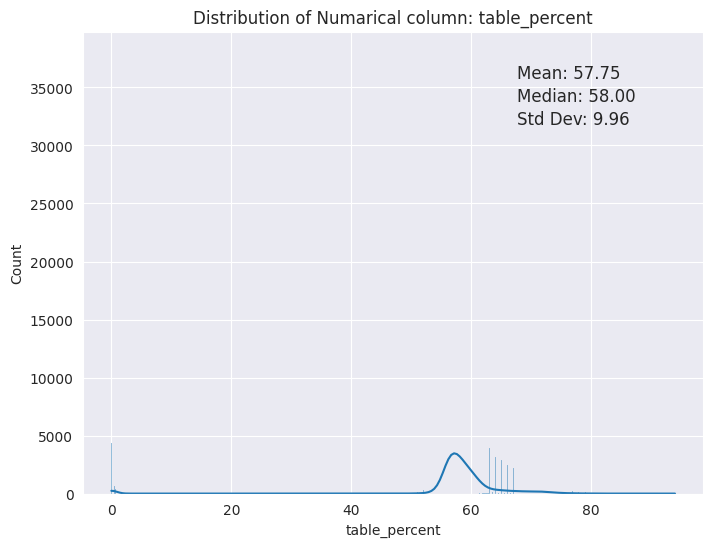

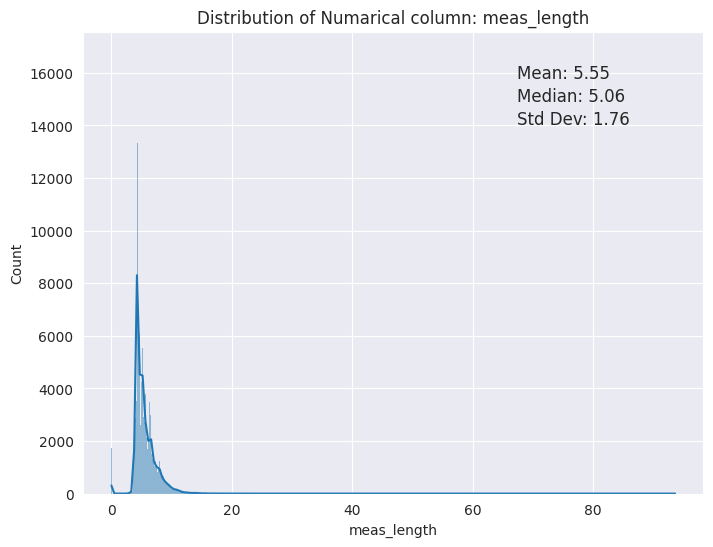

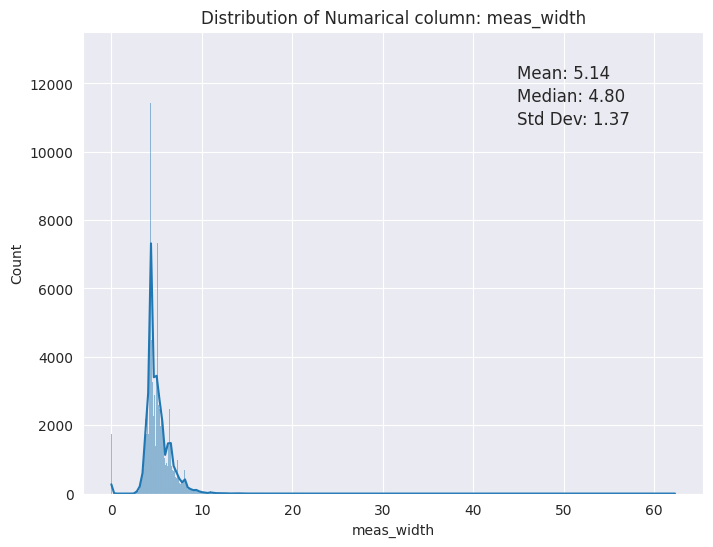

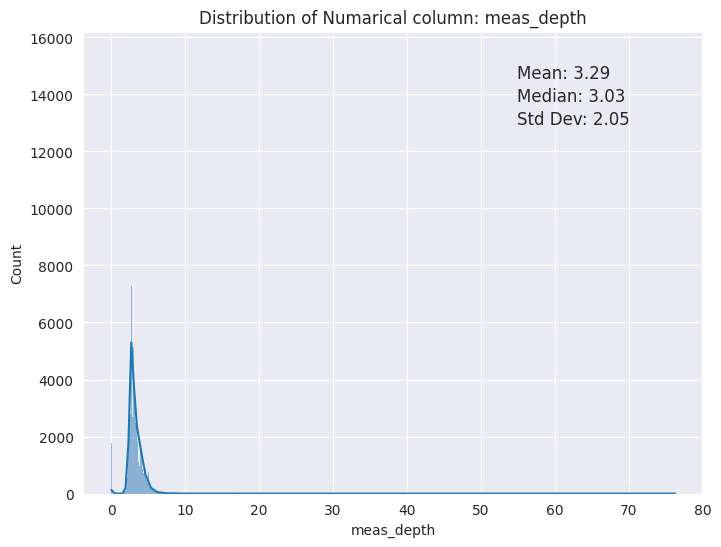

In [23]:
for col in df_num.columns:
    plt.figure(figsize=(8,6))
    
    sns.histplot(df[col],kde=True)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    sd_val = df[col].std()
    
    plt.text(0.7,0.9,f'Mean: {mean_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.85,f'Median: {median_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.8,f'Std Dev: {sd_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    
    plt.xlabel(col)
    plt.title(f'Distribution of Numarical column: {col}')
    plt.show()

In [24]:
df_num.corr()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
carat_weight,1.000000,0.061724,0.090697,0.782683,0.788912,0.350719
depth_percent,0.061724,1.000000,0.673835,0.128791,0.119692,0.086477
table_percent,0.090697,0.673835,1.000000,0.165742,0.141250,0.082533
meas_length,0.782683,0.128791,0.165742,1.000000,0.788652,0.342209
meas_width,0.788912,0.119692,0.141250,0.788652,1.000000,0.412933
meas_depth,0.350719,0.086477,0.082533,0.342209,0.412933,1.000000


<Axes: >

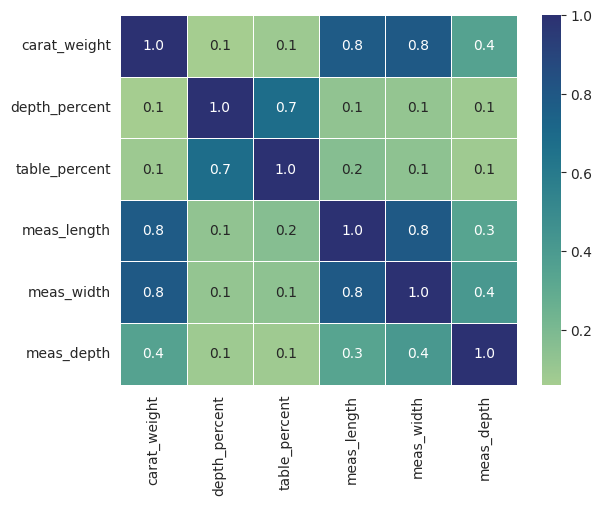

In [25]:
sns.heatmap(df_num.corr(),annot=True,fmt='.1f',linewidth=.5,cmap='crest')

In [26]:
df_num.drop(columns=['meas_length','table_percent'],inplace=True)

In [27]:
df_num.columns

Index(['carat_weight', 'depth_percent', 'meas_width', 'meas_depth'], dtype='object')

# Outliers

In [28]:
# Outlier detection function

def if_Outlier(data,col):
    Q1,Q3 = np.percentile(data[col],[25,75])
    
    IQR = Q3 - Q1
    
    upper_bound = Q3+1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    outlier = data[(data[col] > upper_bound) | (data[col] < lower_bound)]
    
    return outlier

carat_weight


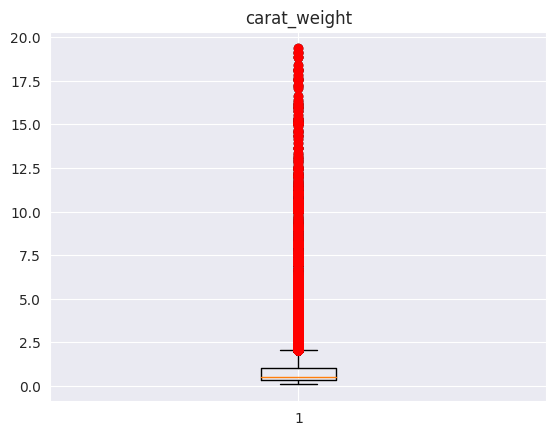

depth_percent


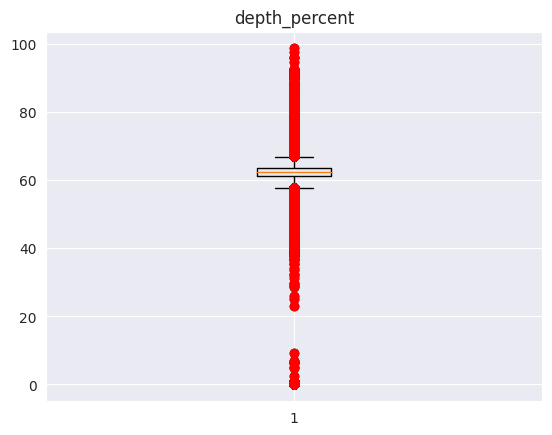

meas_width


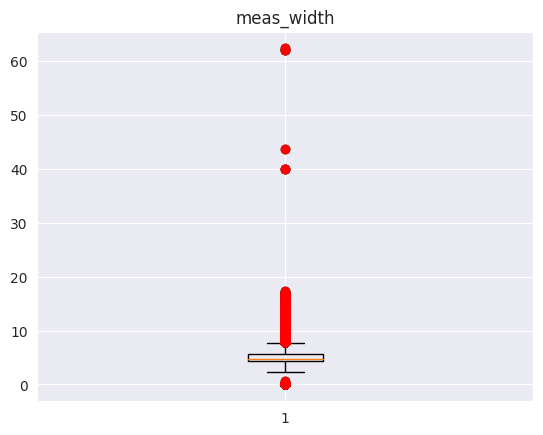

meas_depth


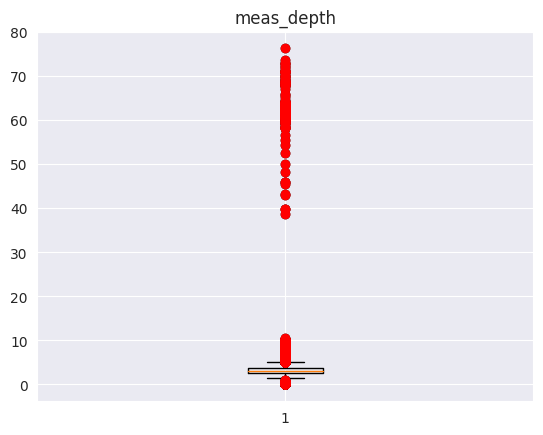

In [29]:
for col in df_num.columns:
    outliers = if_Outlier(df_num,col)
    
    print(col)
    
    # create the boxplot
    fig, ax = plt.subplots()
    ax.boxplot(df_num[col])
    ax.set_title(col)

    # mark the outliers
    for index, row in outliers.iterrows():
        ax.plot(1, row[col], 'ro')

    # show the plot
    plt.show() 

In [30]:
for col in df_num.columns:
    outliers = if_Outlier(df_num,col)
    num_outliers = len(outliers)
    per = (num_outliers/len(df_num))*100
    print(f' Percentage of outlier for {col} is {per}')


 Percentage of outlier for carat_weight is 4.299895768378219
 Percentage of outlier for depth_percent is 15.840020391164437
 Percentage of outlier for meas_width is 5.214312048538254
 Percentage of outlier for meas_depth is 4.1487826747927885


In [31]:
# Outlier detection function

def replacing_outliers(data,col):
    Q1,Q3 = np.percentile(data[col],[25,75])
    
    IQR = Q3 - Q1
    
    upper_bound = Q3+1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    outlier = (data[col] > upper_bound) | (data[col] < lower_bound)
    mean_value = data[col].mean()
    data.loc[outlier, col] = mean_value
    
    return data

In [32]:
for col in df_num.columns:
    df_num = replacing_outliers(df_num,col)

In [33]:
for col in df_num.columns:
    outliers = if_Outlier(df_num,col)
    num_outliers = len(outliers)
    per = (num_outliers/len(df_num))*100
    print(f' Percentage of outlier for {col} is {per}')

 Percentage of outlier for carat_weight is 4.757786648338894
 Percentage of outlier for depth_percent is 11.562882618808118
 Percentage of outlier for meas_width is 2.400968580310692
 Percentage of outlier for meas_depth is 1.618093517157253


# Categorical Features

In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns

print('Categorical Columns are: ', end='')
for col in categorical_columns:
    print(col,end=', ')

Categorical Columns are: cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity, 

In [35]:
df_cat = df[categorical_columns]

In [36]:
for col in categorical_columns:
    print(f'Total Unique Values in \033[1m{col}\033[0m are \033[1m{len(df_cat[col].unique())}\033[0m')

Total Unique Values in cut are 11
Total Unique Values in color are 11
Total Unique Values in clarity are 11
Total Unique Values in cut_quality are 6
Total Unique Values in lab are 3
Total Unique Values in symmetry are 5
Total Unique Values in polish are 5
Total Unique Values in eye_clean are 5
Total Unique Values in culet_size are 9
Total Unique Values in culet_condition are 4
Total Unique Values in girdle_min are 10
Total Unique Values in girdle_max are 10
Total Unique Values in fluor_color are 6
Total Unique Values in fancy_color_dominant_color are 13
Total Unique Values in fancy_color_secondary_color are 11
Total Unique Values in fancy_color_overtone are 9
Total Unique Values in fancy_color_intensity are 10


In [37]:
for col in categorical_columns:
    print(f'Unique Vales of Column {col} are: ')
    print(df_cat[col].unique(),'\n')

Unique Vales of Column cut are: 
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 

Unique Vales of Column color are: 
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 

Unique Vales of Column clarity are: 
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 

Unique Vales of Column cut_quality are: 
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 

Unique Vales of Column lab are: 
['IGI' 'GIA' 'HRD'] 

Unique Vales of Column symmetry are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column polish are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column eye_clean are: 
['unknown' 'Yes' 'E1' 'Borderline' 'No'] 

Unique Vales of Column culet_size are: 
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 

Unique Vales of Column culet_condition are: 
['unknown' 'Abraded' 'Chipped' 'Pointed'] 

Unique Vales of Column girdle_min are: 
['M' 'STK' 'TN' 'TK' 'unknow

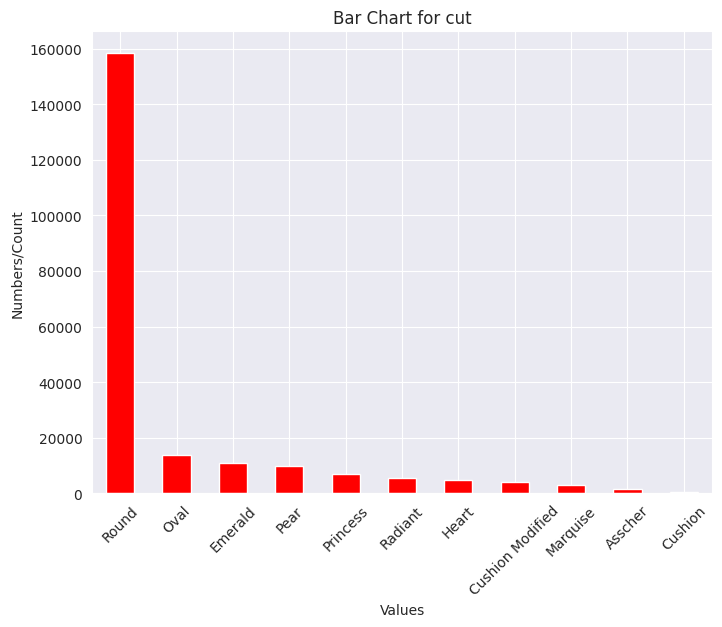

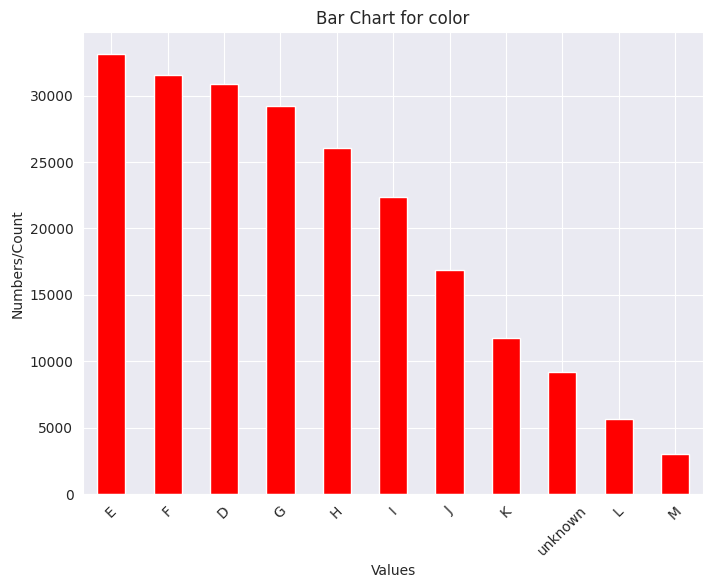

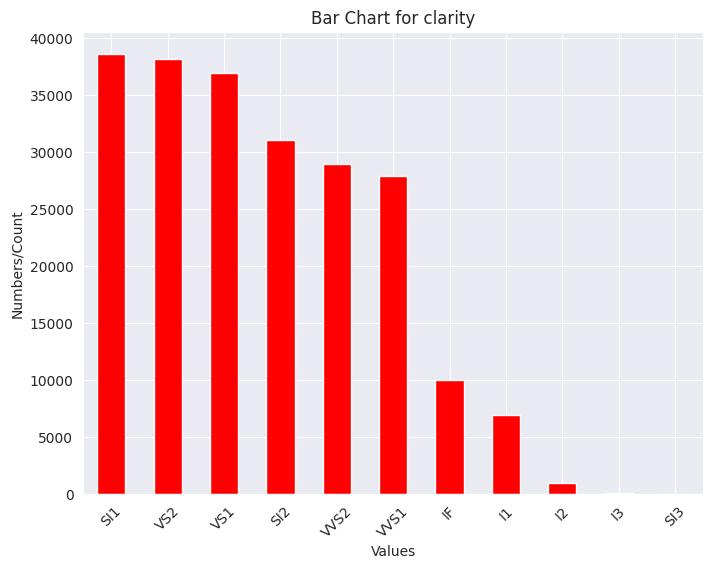

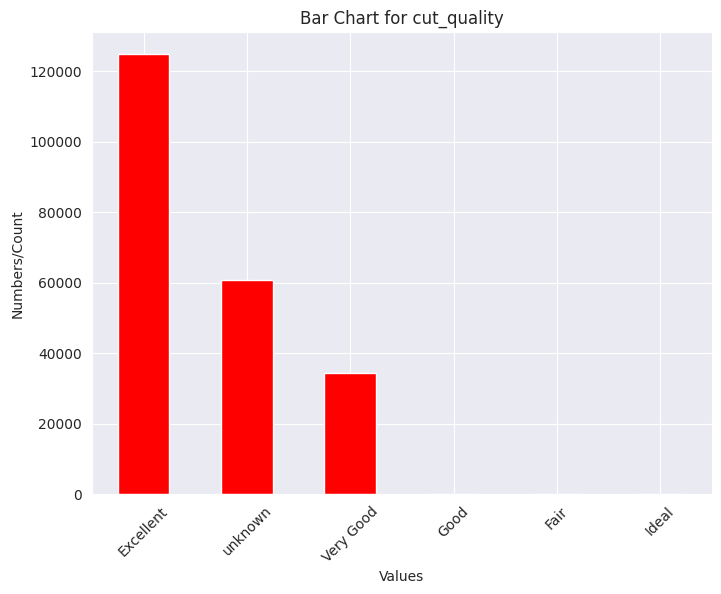

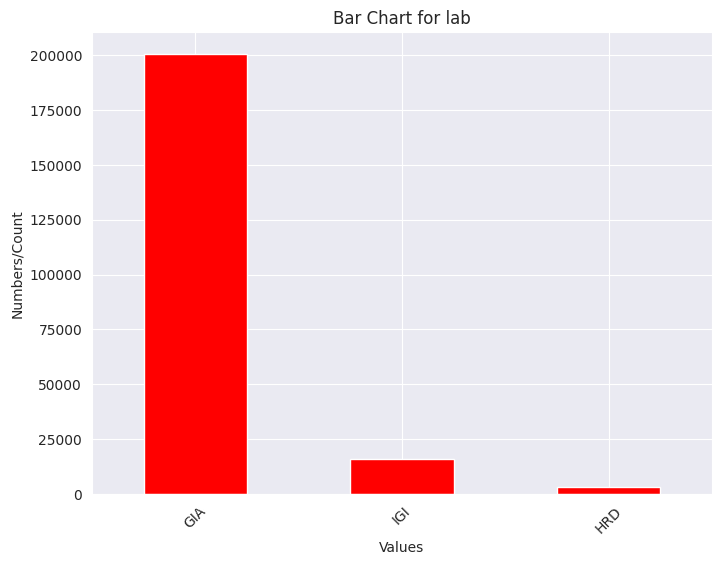

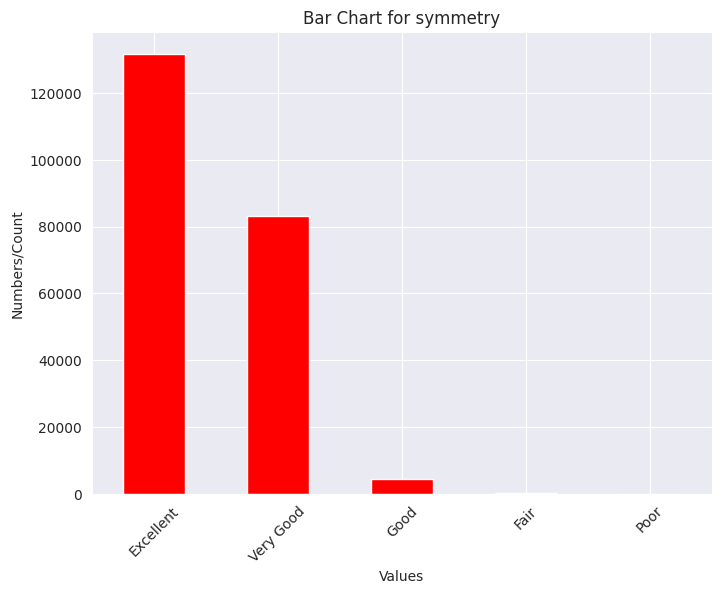

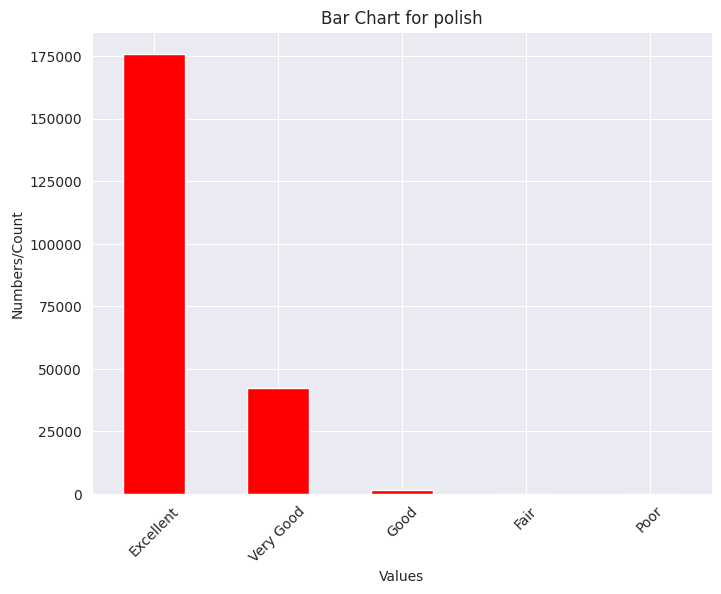

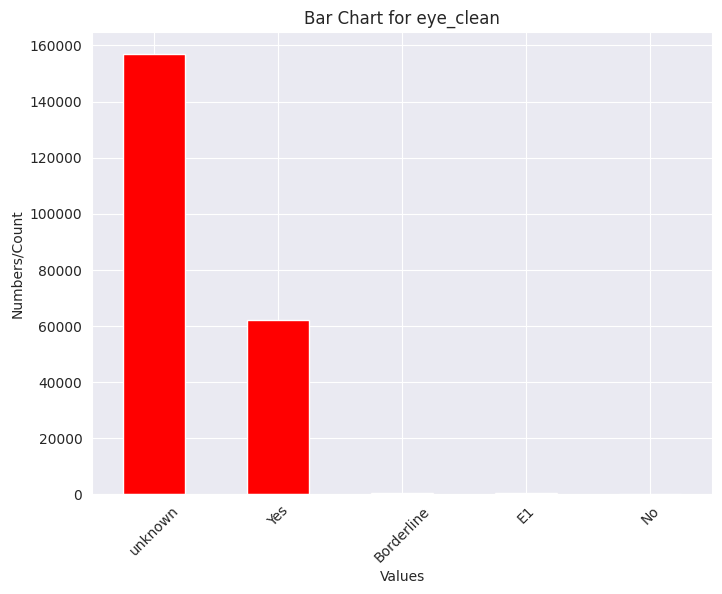

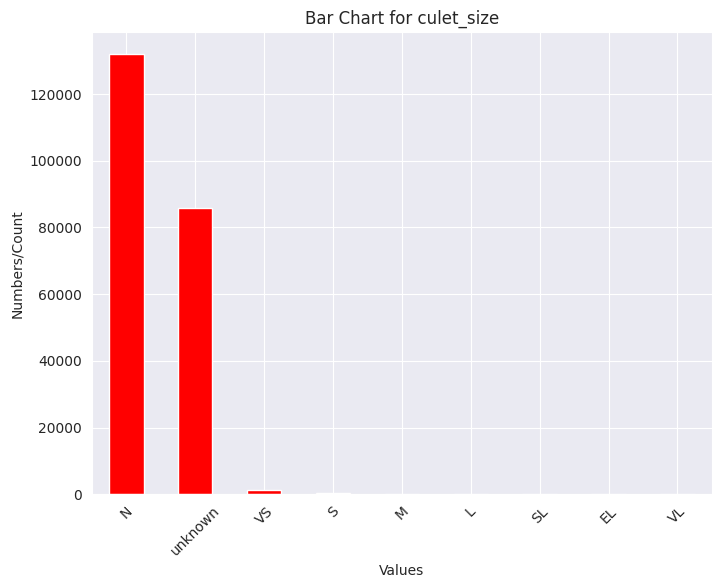

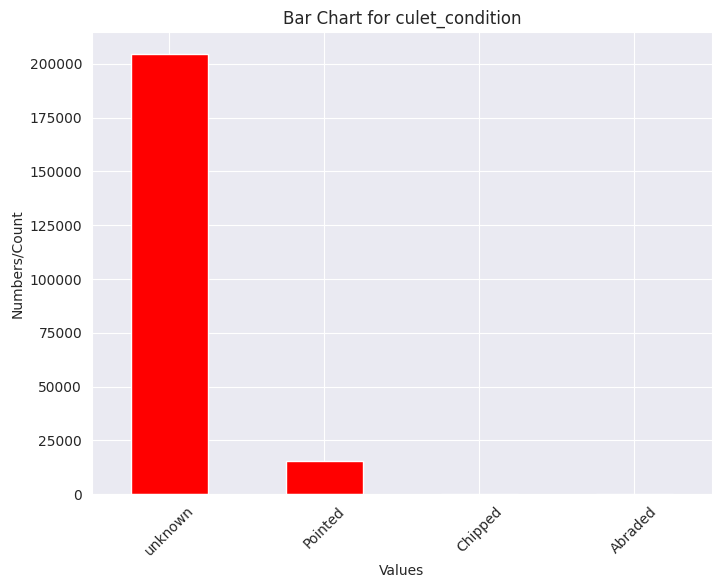

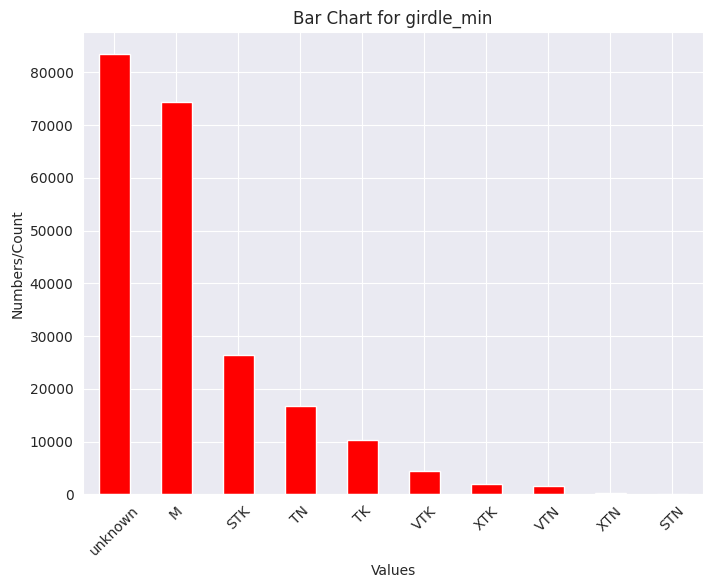

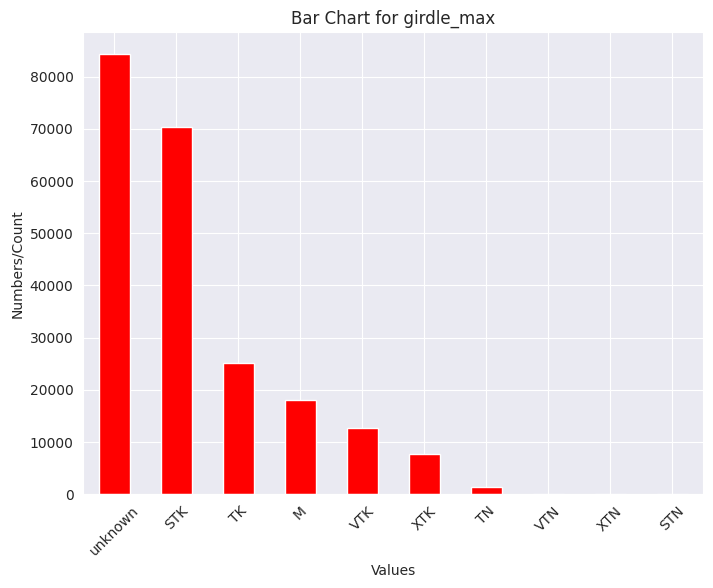

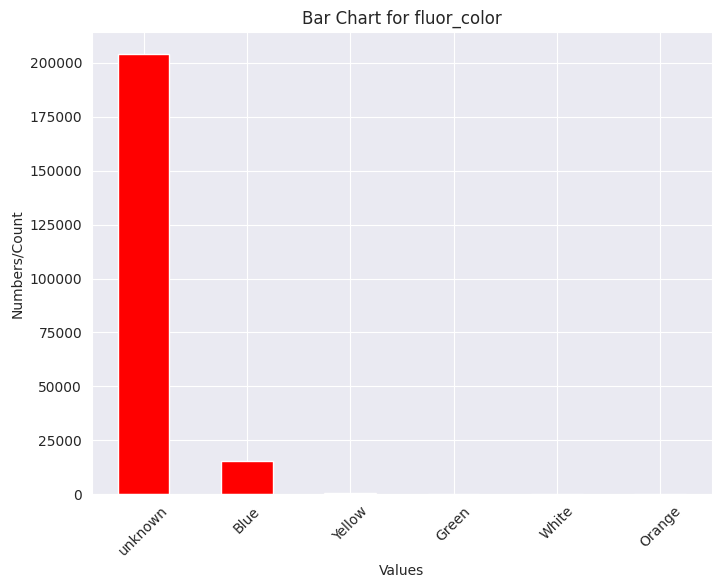

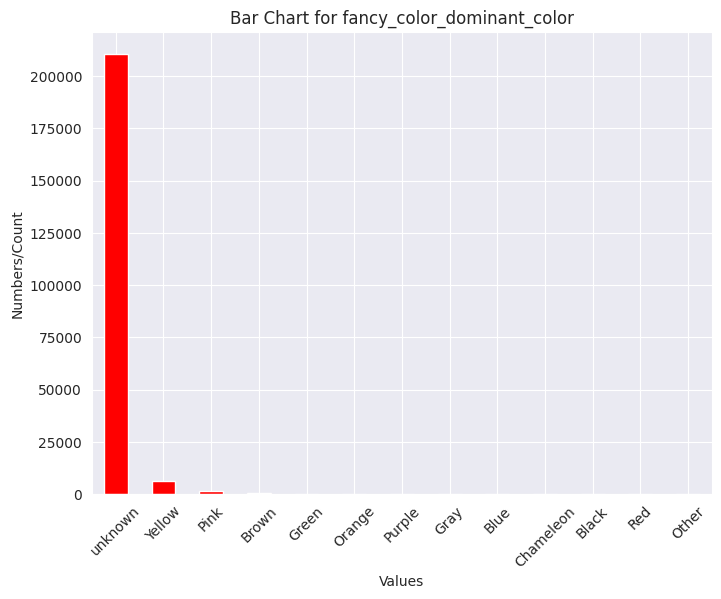

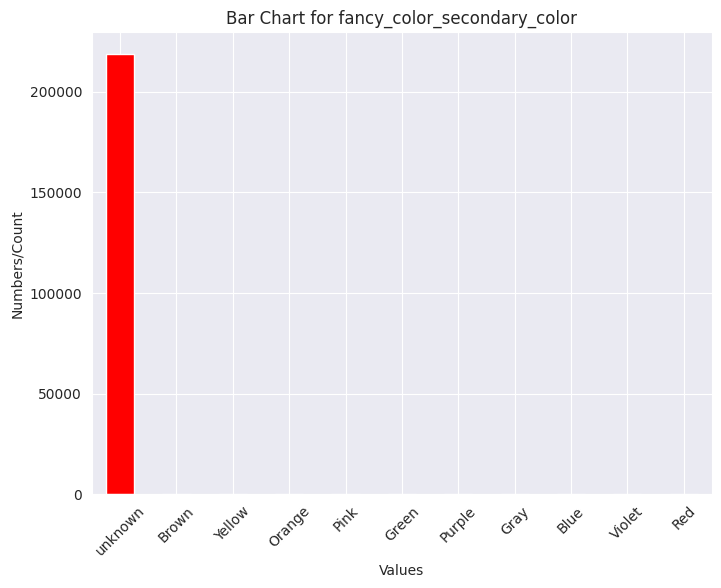

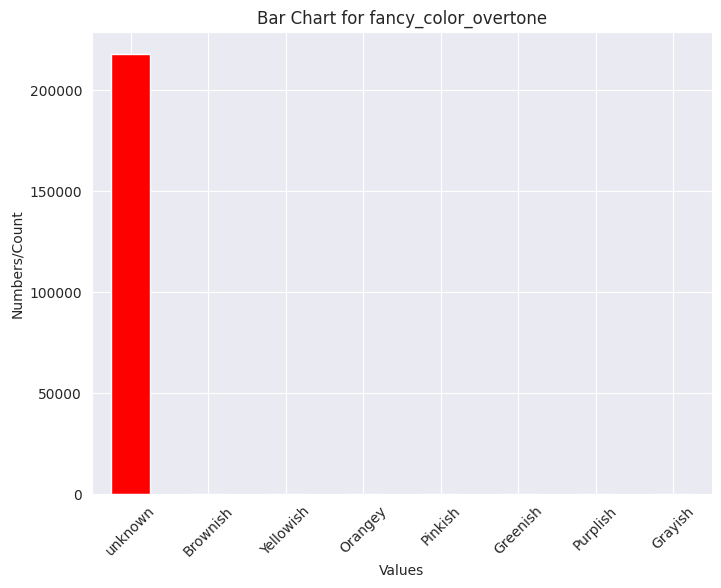

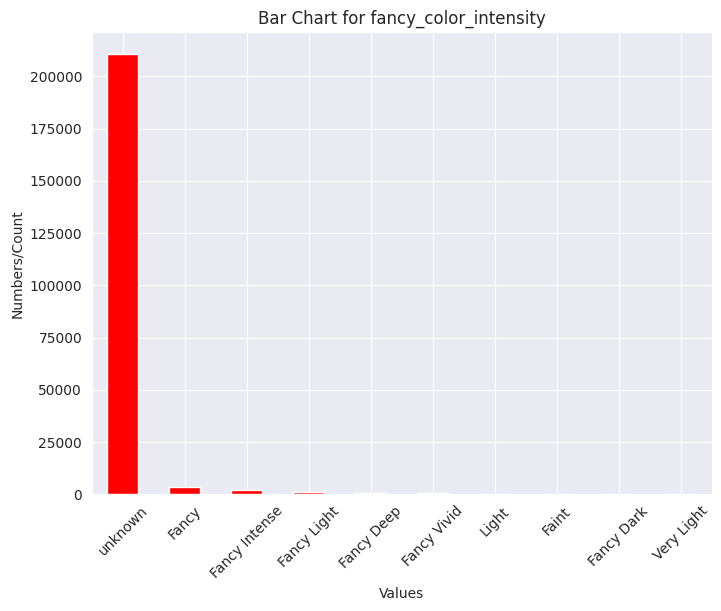

In [38]:
for col in categorical_columns:
    plt.figure(figsize=(8,6))
    df_cat[col].value_counts().plot(kind='bar',color = 'red')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel('Values')
    plt.ylabel('Numbers/Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()
#     plt.bar(df_cat[col])

In [39]:
df_cat.isnull().sum()

cut                               0
color                             0
clarity                           0
cut_quality                       0
lab                               0
symmetry                          0
polish                            0
eye_clean                         0
culet_size                        0
culet_condition                   0
girdle_min                        0
girdle_max                        0
fluor_color                       0
fancy_color_dominant_color        0
fancy_color_secondary_color       0
fancy_color_overtone           1650
fancy_color_intensity             0
dtype: int64

[0]: After calculating the mode, this part extracts the first value from the result. If there are multiple modes (multiple values with the same highest frequency), [0] ensures that only the first one is selected.

In [40]:
df_cat['fancy_color_overtone'].fillna(df_cat['fancy_color_overtone'].mode()[0],inplace=True)

In [41]:
for col in categorical_columns:
    values = df_cat[col].value_counts()
    print(f'Value Counts for{col}')
    print(values)
    print()

Value Counts forcut
cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64

Value Counts forcolor
color
E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: count, dtype: int64

Value Counts forclarity
clarity
SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: count, dtype: int64

Value Counts forcut_quality
cut_quality
Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: count, dtype: int64

Value Coun

In [42]:
df_cat.isnull().sum()

cut                            0
color                          0
clarity                        0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
dtype: int64

# Encoding

In [43]:
for col in categorical_columns:
    print(f'Unique Vales of Column {col} are: ')
    print(df_cat[col].unique(),len(df_cat[col].unique()) ,'\n')

Unique Vales of Column cut are: 
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 11 

Unique Vales of Column color are: 
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 11 

Unique Vales of Column clarity are: 
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 11 

Unique Vales of Column cut_quality are: 
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 6 

Unique Vales of Column lab are: 
['IGI' 'GIA' 'HRD'] 3 

Unique Vales of Column symmetry are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 5 

Unique Vales of Column polish are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 5 

Unique Vales of Column eye_clean are: 
['unknown' 'Yes' 'E1' 'Borderline' 'No'] 5 

Unique Vales of Column culet_size are: 
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 9 

Unique Vales of Column culet_condition are: 
['unknown' 'Abraded' 'Chipped' 'Pointed'] 4 

Unique Vales of Column girdle_min are: 
['M' 

In [44]:
cat_var_prod = list(product(tuple(df_cat.columns),tuple(df_cat.columns), repeat = 1))
cat_var_prod

[('cut', 'cut'),
 ('cut', 'color'),
 ('cut', 'clarity'),
 ('cut', 'cut_quality'),
 ('cut', 'lab'),
 ('cut', 'symmetry'),
 ('cut', 'polish'),
 ('cut', 'eye_clean'),
 ('cut', 'culet_size'),
 ('cut', 'culet_condition'),
 ('cut', 'girdle_min'),
 ('cut', 'girdle_max'),
 ('cut', 'fluor_color'),
 ('cut', 'fancy_color_dominant_color'),
 ('cut', 'fancy_color_secondary_color'),
 ('cut', 'fancy_color_overtone'),
 ('cut', 'fancy_color_intensity'),
 ('color', 'cut'),
 ('color', 'color'),
 ('color', 'clarity'),
 ('color', 'cut_quality'),
 ('color', 'lab'),
 ('color', 'symmetry'),
 ('color', 'polish'),
 ('color', 'eye_clean'),
 ('color', 'culet_size'),
 ('color', 'culet_condition'),
 ('color', 'girdle_min'),
 ('color', 'girdle_max'),
 ('color', 'fluor_color'),
 ('color', 'fancy_color_dominant_color'),
 ('color', 'fancy_color_secondary_color'),
 ('color', 'fancy_color_overtone'),
 ('color', 'fancy_color_intensity'),
 ('clarity', 'cut'),
 ('clarity', 'color'),
 ('clarity', 'clarity'),
 ('clarity', 'cut

In [45]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                df_cat[i[0]], df_cat[i[1]])))[1]))
result

[('cut', 'color', 0.0),
 ('cut', 'clarity', 0.0),
 ('cut', 'cut_quality', 0.0),
 ('cut', 'lab', 0.0),
 ('cut', 'symmetry', 0.0),
 ('cut', 'polish', 0.0),
 ('cut', 'eye_clean', 0.0),
 ('cut', 'culet_size', 0.0),
 ('cut', 'culet_condition', 0.0),
 ('cut', 'girdle_min', 0.0),
 ('cut', 'girdle_max', 0.0),
 ('cut', 'fluor_color', 0.0),
 ('cut', 'fancy_color_dominant_color', 0.0),
 ('cut', 'fancy_color_secondary_color', 0.0),
 ('cut', 'fancy_color_overtone', 0.0),
 ('cut', 'fancy_color_intensity', 0.0),
 ('color', 'cut', 0.0),
 ('color', 'clarity', 0.0),
 ('color', 'cut_quality', 0.0),
 ('color', 'lab', 0.0),
 ('color', 'symmetry', 0.0),
 ('color', 'polish', 0.0),
 ('color', 'eye_clean', 0.0),
 ('color', 'culet_size', 1.1618201924241455e-155),
 ('color', 'culet_condition', 0.0),
 ('color', 'girdle_min', 0.0),
 ('color', 'girdle_max', 0.0),
 ('color', 'fluor_color', 0.0),
 ('color', 'fancy_color_dominant_color', 0.0),
 ('color', 'fancy_color_secondary_color', 0.0),
 ('color', 'fancy_color_ove

https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7

In [46]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,clarity,color,culet_condition,culet_size,cut,cut_quality,eye_clean,fancy_color_dominant_color,fancy_color_intensity,fancy_color_overtone,fancy_color_secondary_color,fluor_color,girdle_max,girdle_min,lab,polish,symmetry
var1,,,,,,,,,,,,,,,,,
clarity,NaN,0.000000e+00,2.298988e-36,7.309786e-82,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.176268e-130,0.000000e+00,3.185674e-140,0.000000e+00,0.000000e+00,3.610701e-303,0.000000e+00,0.000000e+00
color,0.000000e+00,NaN,0.000000e+00,1.161820e-155,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
culet_condition,2.298988e-36,0.000000e+00,NaN,0.000000e+00,0.0,7.351171e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.608976e-01,1.540616e-91,7.558140e-44,0.000000e+00,0.000000e+00,0.000000e+00,2.664486e-50,0.000000e+00
culet_size,7.309786e-82,1.161820e-155,0.000000e+00,NaN,0.0,2.185416e-229,0.000000e+00,2.436904e-274,2.033759e-258,5.916206e-09,1.128827e-88,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cut,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cut_quality,0.000000e+00,0.000000e+00,7.351171e-10,2.185416e-229,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.910806e-163,0.000000e+00,6.229343e-123,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
eye_clean,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,6.278876e-275,5.022401e-283,2.281785e-04,4.721316e-04,1.639979e-80,0.000000e+00,0.000000e+00,7.022318e-138,5.168529e-196,0.000000e+00
fancy_color_dominant_color,0.000000e+00,0.000000e+00,0.000000e+00,2.436904e-274,0.0,0.000000e+00,6.278876e-275,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504769e-139,0.000000e+00,0.000000e+00
fancy_color_intensity,0.000000e+00,0.000000e+00,0.000000e+00,2.033759e-258,0.0,0.000000e+00,5.022401e-283,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.315036e-144,0.000000e+00,0.000000e+00


<Axes: xlabel='var2', ylabel='var1'>

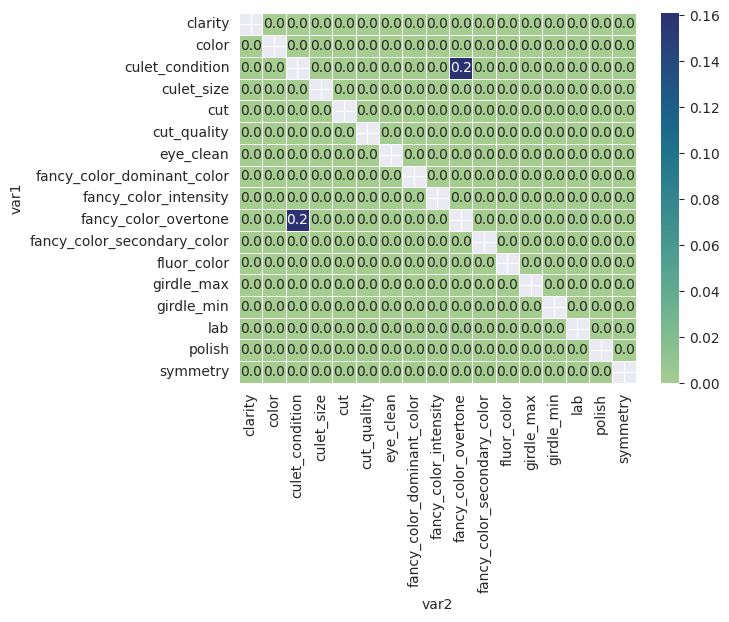

In [47]:
sns.heatmap(chi_test_output.pivot(index='var1', columns='var2', values='coeff'),annot=True,fmt='.1f',linewidth=.5,cmap='crest')

In [48]:
df_cat.drop(columns='fancy_color_overtone', inplace = True)

In [49]:
df_cat.columns

Index(['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish',
       'eye_clean', 'culet_size', 'culet_condition', 'girdle_min',
       'girdle_max', 'fluor_color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_intensity'],
      dtype='object')

In [50]:
for col in df_cat.columns:
    print(f'Unique Vales of Column {col} are: ')
    print(df_cat[col].unique(),len(df_cat[col].unique()) ,'\n')

Unique Vales of Column cut are: 
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 11 

Unique Vales of Column color are: 
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 11 

Unique Vales of Column clarity are: 
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 11 

Unique Vales of Column cut_quality are: 
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 6 

Unique Vales of Column lab are: 
['IGI' 'GIA' 'HRD'] 3 

Unique Vales of Column symmetry are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 5 

Unique Vales of Column polish are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 5 

Unique Vales of Column eye_clean are: 
['unknown' 'Yes' 'E1' 'Borderline' 'No'] 5 

Unique Vales of Column culet_size are: 
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 9 

Unique Vales of Column culet_condition are: 
['unknown' 'Abraded' 'Chipped' 'Pointed'] 4 

Unique Vales of Column girdle_min are: 
['M' 

In [51]:
(df_cat.columns).tolist()

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_intensity']

In [52]:
categories = ['cut_quality','polish','culet_size','culet_condition','symmetry','fancy_color_intensity']

df_encoded = df[categories].copy()

# Create OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit and transform the data
df_encoded[categories] = encoder.fit_transform(df_cat[categories])

df_encoded = df_encoded.astype(int)

print(df_encoded)


        cut_quality  polish  culet_size  culet_condition  symmetry  \
0                 0       4           3                3         4   
1                 4       4           3                3         4   
2                 0       4           8                3         4   
3                 0       4           8                3         4   
4                 4       0           3                3         4   
...             ...     ...         ...              ...       ...   
219698            0       0           3                3         0   
219699            5       4           8                3         4   
219700            0       0           3                3         0   
219701            5       2           3                3         2   
219702            5       0           8                3         4   

        fancy_color_intensity  
0                           9  
1                           9  
2                           9  
3                           9  

In [53]:
df_cat.drop(columns=categories, inplace = True)

In [54]:
len((df_cat.columns.tolist()))
df_cat.columns

Index(['cut', 'color', 'clarity', 'lab', 'eye_clean', 'girdle_min',
       'girdle_max', 'fluor_color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color'],
      dtype='object')

In [55]:
cat = ['lab','eye_clean']
df_cat_one_hot = df_cat[cat].copy()
df_cat_dummy = pd.get_dummies(df_cat_one_hot,columns=['lab','eye_clean'], dtype=int)

In [56]:
df_cat_dummy

,lab_GIA,lab_HRD,lab_IGI,eye_clean_Borderline,eye_clean_E1,eye_clean_No,eye_clean_Yes,eye_clean_unknown
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
219698,1,0,0,0,0,0,0,1
219699,1,0,0,0,0,0,0,1
219700,1,0,0,0,0,0,0,1
219701,1,0,0,0,0,0,0,1


In [57]:
df_cat.drop(columns=['lab','eye_clean'],inplace = True)

In [58]:
#concatenating atrget and cat df for target encoding
df_cat = pd.concat([df_y,df_cat],axis=1)  # Using .concat function to join the target variables and categorical features
df_cat

,total_sales_price,cut,color,clarity,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color
0,200,Round,E,VVS2,M,M,unknown,unknown,unknown
1,200,Round,E,VVS2,STK,STK,unknown,unknown,unknown
2,200,Round,E,VVS2,TN,M,unknown,unknown,unknown
3,200,Round,E,VVS2,M,STK,unknown,unknown,unknown
4,200,Round,E,VVS2,STK,STK,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...
219698,1210692,Round,E,VS1,M,STK,unknown,unknown,unknown
219699,1292500,Radiant,unknown,VS2,TK,XTK,unknown,Green,unknown
219700,1315496,Round,E,VS1,TN,M,unknown,unknown,unknown
219701,1350000,Princess,unknown,SI2,XTN,VTK,unknown,Red,unknown


In [ ]:
label_encoder = LabelEncoder()

cat_columns = ['cut', 'color', 'clarity', 'girdle_min', 'girdle_max', 'fluor_color','fancy_color_secondary_color','fancy_color_dominant_color']

# Loop through each categorical column and encode it
for column in cat_columns:
    df_cat[column] = label_encoder.fit_transform(df_cat[column])

df_cat

In [59]:
cat_columns = ['cut', 'color', 'clarity', 'girdle_min', 'girdle_max', 'fluor_color','fancy_color_secondary_color','fancy_color_dominant_color']

for cat_col in cat_columns:
    target_encoding = df_cat.groupby(cat_col)['total_sales_price'].mean()
    df_cat[cat_col + '_target_encode'] = df_cat[cat_col].map(target_encoding)

df_cat
    

,total_sales_price,cut,color,clarity,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,cut_target_encode,color_target_encode,clarity_target_encode,girdle_min_target_encode,girdle_max_target_encode,fluor_color_target_encode,fancy_color_secondary_color_target_encode,fancy_color_dominant_color_target_encode
0,200,Round,E,VVS2,M,M,unknown,unknown,unknown,5031.851146,5321.490409,6282.047093,5795.519571,8091.100962,6683.932522,6855.883398,6374.641800
1,200,Round,E,VVS2,STK,STK,unknown,unknown,unknown,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.641800
2,200,Round,E,VVS2,TN,M,unknown,unknown,unknown,5031.851146,5321.490409,6282.047093,8892.000956,8091.100962,6683.932522,6855.883398,6374.641800
3,200,Round,E,VVS2,M,STK,unknown,unknown,unknown,5031.851146,5321.490409,6282.047093,5795.519571,5564.341496,6683.932522,6855.883398,6374.641800
4,200,Round,E,VVS2,STK,STK,unknown,unknown,unknown,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.641800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,1210692,Round,E,VS1,M,STK,unknown,unknown,unknown,5031.851146,5321.490409,7695.625257,5795.519571,5564.341496,6683.932522,6855.883398,6374.641800
219699,1292500,Radiant,unknown,VS2,TK,XTK,unknown,Green,unknown,16734.435524,19166.869788,7535.977759,11808.529025,14051.043154,6683.932522,6855.883398,37451.768212
219700,1315496,Round,E,VS1,TN,M,unknown,unknown,unknown,5031.851146,5321.490409,7695.625257,8892.000956,8091.100962,6683.932522,6855.883398,6374.641800
219701,1350000,Princess,unknown,SI2,XTN,VTK,unknown,Red,unknown,8573.694610,19166.869788,6570.390741,25056.455479,11680.268872,6683.932522,6855.883398,739790.000000


In [65]:
 col_list = []
for col in df_cat.columns:
    if ('_target_encode' in col):
        col_list.append(col)
        
df_cat_2 = df_cat[col_list]
print(col_list)

['cut_target_encode', 'color_target_encode', 'clarity_target_encode', 'girdle_min_target_encode', 'girdle_max_target_encode', 'fluor_color_target_encode', 'fancy_color_secondary_color_target_encode', 'fancy_color_dominant_color_target_encode']


In [66]:
df_cat_2

,cut_target_encode,color_target_encode,clarity_target_encode,girdle_min_target_encode,girdle_max_target_encode,fluor_color_target_encode,fancy_color_secondary_color_target_encode,fancy_color_dominant_color_target_encode
0,5031.851146,5321.490409,6282.047093,5795.519571,8091.100962,6683.932522,6855.883398,6374.641800
1,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.641800
2,5031.851146,5321.490409,6282.047093,8892.000956,8091.100962,6683.932522,6855.883398,6374.641800
3,5031.851146,5321.490409,6282.047093,5795.519571,5564.341496,6683.932522,6855.883398,6374.641800
4,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.641800
...,...,...,...,...,...,...,...,...
219698,5031.851146,5321.490409,7695.625257,5795.519571,5564.341496,6683.932522,6855.883398,6374.641800
219699,16734.435524,19166.869788,7535.977759,11808.529025,14051.043154,6683.932522,6855.883398,37451.768212
219700,5031.851146,5321.490409,7695.625257,8892.000956,8091.100962,6683.932522,6855.883398,6374.641800
219701,8573.694610,19166.869788,6570.390741,25056.455479,11680.268872,6683.932522,6855.883398,739790.000000


In [67]:
complete_x_df = pd.concat([df_num,df_encoded,df_cat_dummy,df_cat_2],axis = 1)

complete_x_df.head()

,carat_weight,depth_percent,meas_width,meas_depth,cut_quality,polish,culet_size,culet_condition,symmetry,fancy_color_intensity,...,eye_clean_Yes,eye_clean_unknown,cut_target_encode,color_target_encode,clarity_target_encode,girdle_min_target_encode,girdle_max_target_encode,fluor_color_target_encode,fancy_color_secondary_color_target_encode,fancy_color_dominant_color_target_encode
0,0.09,62.7,2.87,1.79,0,4,3,3,4,9,...,0,1,5031.851146,5321.490409,6282.047093,5795.519571,8091.100962,6683.932522,6855.883398,6374.6418
1,0.09,61.9,2.89,1.78,4,4,3,3,4,9,...,0,1,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.6418
2,0.09,61.1,2.90,1.77,0,4,8,3,4,9,...,0,1,5031.851146,5321.490409,6282.047093,8892.000956,8091.100962,6683.932522,6855.883398,6374.6418
3,0.09,62.0,2.88,1.78,0,4,8,3,4,9,...,0,1,5031.851146,5321.490409,6282.047093,5795.519571,5564.341496,6683.932522,6855.883398,6374.6418
4,0.09,64.9,2.83,1.82,4,0,3,3,4,9,...,0,1,5031.851146,5321.490409,6282.047093,7676.020999,5564.341496,6683.932522,6855.883398,6374.6418


In [68]:
df_y.head()

0    200
1    200
2    200
3    200
4    200
Name: total_sales_price, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(complete_x_df, df_y, test_size=0.33, random_state=84)

In [70]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((147201, 26), (72502, 26), (147201,), (72502,))

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.metrics import r2_score,make_scorer,mean_squared_error

In [73]:
models = [KNeighborsRegressor(), SGDRegressor(), Lasso(), Ridge(), CatBoostRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    score = r2_score(y_test, ypred)
    print("model: {}  score {}".format(model, score))

model: KNeighborsRegressor()  score -0.05275418898832873
model: SGDRegressor()  score -3.3957951952486153e+24
model: Lasso()  score 0.11292114367448136
model: Ridge()  score 0.11292732477124467
Learning rate set to 0.090097
0:	learn: 25217.7485118	total: 78.7ms	remaining: 1m 18s
1:	learn: 24536.7497945	total: 98.5ms	remaining: 49.2s
2:	learn: 23924.0750963	total: 119ms	remaining: 39.5s
3:	learn: 23419.8078388	total: 139ms	remaining: 34.7s
4:	learn: 22956.1371630	total: 157ms	remaining: 31.3s
5:	learn: 22589.3005444	total: 180ms	remaining: 29.8s
6:	learn: 22258.1923998	total: 199ms	remaining: 28.3s
7:	learn: 21946.8282883	total: 218ms	remaining: 27.1s
8:	learn: 21702.4017691	total: 240ms	remaining: 26.4s
9:	learn: 21485.2011257	total: 262ms	remaining: 26s
10:	learn: 21303.1826737	total: 284ms	remaining: 25.6s
11:	learn: 21131.9574248	total: 303ms	remaining: 24.9s
12:	learn: 20981.7368615	total: 325ms	remaining: 24.7s
13:	learn: 20881.3572469	total: 343ms	remaining: 24.2s
14:	learn: 2076

In [85]:
xgb=XGBRegressor()
# hyperparamètres
hyperparameters = {'max_depth': [ 7,30,40,60,100],
                   'learning_rate': [0.3,0.4,0.2,0.1],
                   'n_estimators': [100, 500,50,60,70],
                   'subsample': [0.1,0.3,0.5,0.6,0.7,0.8,0.55],
                   'colsample_bytree': [0.6, 0.7,0.75, 0.8],
                   'gamma': [0, 0.1, 0.3,0.36,0.38],
                   'reg_lambda': [0, 1,25,30,35,33]}

scorer = make_scorer(r2_score)
rs = RandomizedSearchCV(xgb, hyperparameters, n_iter=25,scoring=scorer, cv=10, random_state=42, n_jobs=-1,verbose=1)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          random_state=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.75,
                                                             0.8],
                                        'gamma': [0, 0.1, 0.3, 0.36, 0.38],
                                        'learning_rate': [0.3, 0.4, 0.2, 0.1],
                                        'max_depth': [7, 30, 40, 60, 100],
                                        'n_estimators': [100, 500, 50, 60, 70],
                                        'reg_lambda': [0, 1, 25, 30, 35, 33],
                                        'subsample': [0.1, 0.3, 0.5, 0.6, 0.7,
                                                      0.8, 0.55]},
                   random_state=42, scoring=make_scorer(r2_score), verbose=1)

In [86]:
print(rs.best_params_)

{'subsample': 0.6, 'reg_lambda': 35, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.75}


In [87]:
print(rs.best_score_)

0.4917626550800131


In [88]:
y_pred = rs.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("R2 Score:", r2)
print("RMSE:", rmse)

MSE: 332557396.8748486
R2 Score: 0.4986345458107819
RMSE: 18236.156307589838
